In [ ]:
#Importing the necessary libraries and reading the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Dummy Data HSS.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [ ]:
data.shape

(4572, 5)

In [ ]:
#Checking for null values in the data
data.isnull().sum()


,0
TV,10
Radio,4
Social Media,6
Influencer,0
Sales,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [ ]:
#Imputing the missing values with the mean
for i in ['TV','Radio','Social Media','Sales']:
  data[i] = data[i].fillna(data[i].mean())

data


,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [ ]:
data.isnull().sum()

,0
TV,0
Radio,0
Social Media,0
Influencer,0
Sales,0


In [ ]:
data['Influencer'].value_counts()

,count
Influencer,
Mega,1158
Micro,1153
Nano,1139
Macro,1122


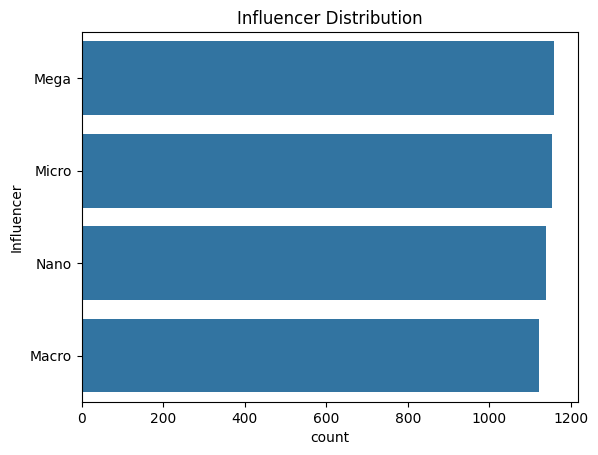

In [ ]:
#Countplot of Influencer distribution
sns.countplot(data['Influencer'])
plt.title('Influencer Distribution')
plt.show()

In [ ]:
#Performing One Hot Encoding on the influencer column and mapping False to 0 and True to 1
data= pd.get_dummies(data)
for columns in ['Influencer_Macro','Influencer_Mega','Influencer_Micro','Influencer_Nano']:
  data[columns] = data[columns].map({False:0,True:1})
data

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0,0,1,0
4568,71.0,20.610685,6.545573,249.101915,0,0,0,1
4569,44.0,19.800072,5.096192,163.631457,0,0,1,0
4570,71.0,17.534640,1.940873,253.610411,1,0,0,0


Text(0.5, 1.0, 'Correlation Heatmap')

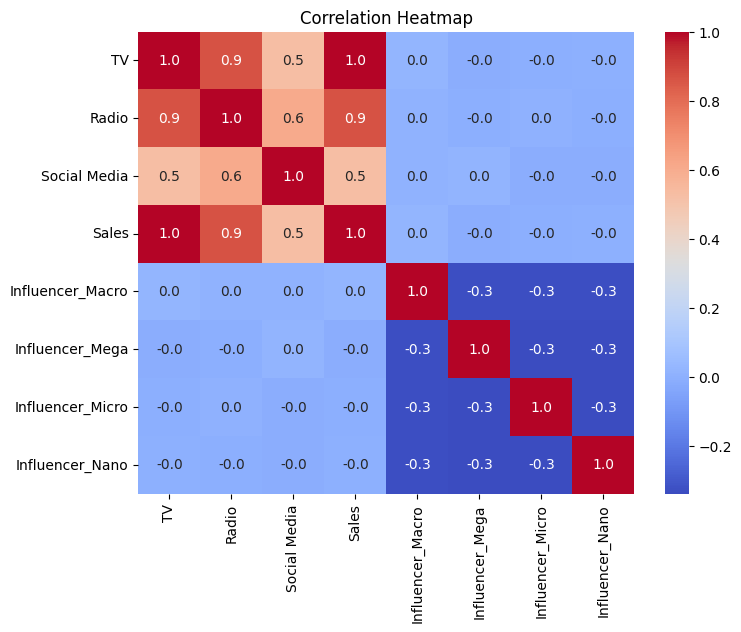

In [ ]:
#Correlation Heatmap of the dataset
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.1f')
plt.title('Correlation Heatmap')

In [ ]:
#Creating X,y variables for train and test split(80-20) and scaler for scaling the data
X= data.drop(columns=['Sales'],axis=1)
y= data['Sales']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
scale= StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [ ]:
#Importing the Linear Regression Model, fitting model with training data and evaluating it with r2_score and RMSE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,root_mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)
linear_pred = linear_model.predict(X_test_scaled)

In [ ]:
R2_score = r2_score(y_test,linear_pred)
RMSE = root_mean_squared_error(y_test,linear_pred)
print('R2 Score:',R2_score)
print('RMSE:',RMSE)

R2 Score: 0.9924019878236671
RMSE: 7.963290170403834


In [ ]:
linear_model.intercept_

np.float64(192.97236290521005)

In [ ]:
#Importing the Support Vector Regressor Model, fitting model with training data and evaluating it with r2_score and RMSE
from sklearn.svm import SVR

svr_model = SVR(kernel='poly')
svr_model.fit(X_train_scaled,y_train)
svr_pred = svr_model.predict(X_test_scaled)

In [ ]:
r2_svr = r2_score(y_test,svr_pred)
rmse_svr = root_mean_squared_error(y_test,svr_pred)
print('R2 Score:',r2_svr)
print('RMSE:',rmse_svr)

R2 Score: 0.9804098851647588
RMSE: 12.78677547356856


In [ ]:

#Importing the Random Forest Regressor Model, fitting it with training data and evaluating it with r2_score and RMSE
from sklearn.ensemble import RandomForestRegressor

rf_model= RandomForestRegressor(n_estimators=150,max_depth=5)
rf_model.fit(X_train_scaled,y_train)
rf_pred = rf_model.predict(X_test_scaled)
r2_rf = r2_score(y_test,rf_pred)
rmse_rf = root_mean_squared_error(y_test,rf_pred)
print('R2 Score:',r2_rf)
print('RMSE:',rmse_rf)

R2 Score: 0.9942174255071718
RMSE: 6.947093860289484


Text(0.5, 1.0, 'Feature Importance')

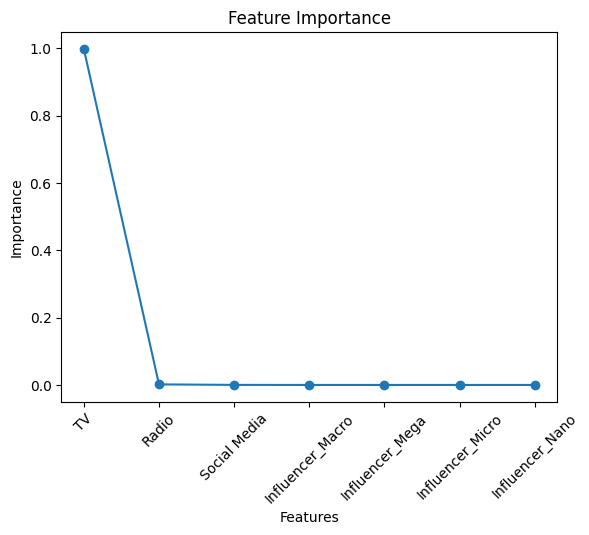

In [ ]:
plt.plot(rf_model.feature_importances_,marker='o')
plt.xticks(range(len(X.columns)),X.columns,rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

In [ ]:
#Importing the Decision Tree Regressor Model, fitting it with training data and evaluating it with r2_score and RMSE
from sklearn.tree import DecisionTreeRegressor,plot_tree

dtree_model = DecisionTreeRegressor(criterion='squared_error',max_depth=5)
dtree_model.fit(X_train_scaled,y_train)
dtree_pred = dtree_model.predict(X_test_scaled)
r2_dtree = r2_score(y_test,dtree_pred)
rmse_dtree = root_mean_squared_error(y_test,dtree_pred)
print('R2 Score:',r2_dtree)
print('RMSE:',rmse_dtree)

R2 Score: 0.9914513624040139
RMSE: 8.446776473458405


In [ ]:
#Importing the Gradient Boosting Regressor Model, fitting it with training data and evaluating it with r2_score and RMSE
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=5)
gbr_model.fit(X_train_scaled,y_train)
gbr_pred = gbr_model.predict(X_test_scaled)
r2_gbr = r2_score(y_test,gbr_pred)
rmse_gbr = root_mean_squared_error(y_test,gbr_pred)
print('R2 Score:',r2_gbr)
print('RMSE:',rmse_gbr)

R2 Score: 0.9947043606962037
RMSE: 6.648164345501044


In [ ]:
#Importing the AdaBoost Regressor and Voting Regressor, fitting them with training data and evaluating them with r2_score and RMSE
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

abr_model = AdaBoostRegressor(n_estimators=100,learning_rate=0.1)
abr_model.fit(X_train_scaled,y_train)
abr_pred = abr_model.predict(X_test_scaled)
r2_abr = r2_score(y_test,abr_pred)
rmse_abr = root_mean_squared_error(y_test,abr_pred)
print('R2 Score:',r2_abr)
print('RMSE:',rmse_abr)

R2 Score: 0.9787581249496119
RMSE: 13.31493263100596


In [ ]:
voting_model = VotingRegressor(estimators=[('linear',linear_model),('svr',svr_model),('rf',rf_model),('dtree',dtree_model),('gbr',gbr_model),('abr',abr_model)])

In [ ]:
voting_model.fit(X_train_scaled,y_train)
voting_pred = voting_model.predict(X_test_scaled)
r2_voting = r2_score(y_test,voting_pred)
rmse_voting = root_mean_squared_error(y_test,voting_pred)
print('R2 Score:',r2_voting)
print('RMSE:',rmse_voting)

R2 Score: 0.9929038178496558
RMSE: 7.695820434974764


In [ ]:
#Importing Tensorflow libraries for neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1,l2


In [ ]:
#Creating a 3 layer Neural Network with 1 output layer and with L1 and L2 kernel regularizer
neural_model= Sequential([
    Dense(64,activation='relu',kernel_regularizer=l1(0.02),input_shape=(X_train_derived_scaled.shape[1],)),
    Dense(32,activation='relu',kernel_regularizer=l2(0.02)),
    Dense(16,activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compiling the model and fitting it with training data and running 10 epochs
neural_model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
neural_model.fit(X_train_scaled,y_train,epochs=10,validation_data=(X_test_scaled,y_test))
neural_pred = neural_model.predict(X_test_scaled)


Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 42924.5742 - val_loss: 27792.7969
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15206.0898 - val_loss: 1228.0758
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1052.0366 - val_loss: 593.2867
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 483.0487 - val_loss: 348.1827
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 289.5208 - val_loss: 205.2146
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 163.8402 - val_loss: 128.2836
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 116.4495 - val_loss: 98.0759
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 76.2004 - val_loss: 90.0746
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 79.8344 - val_loss: 82.8859
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.0704 - val_loss: 81.4895
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
#Evaluating the model
r2_neural= r2_score(y_test,neural_pred)
rmse_neural = root_mean_squared_error(y_test,neural_pred)
print('R2 Score:',r2_neural)
print('RMSE:',rmse_neural)

R2 Score: 0.990819690320825
RMSE: 8.753287926946042


CREATING DERIVED VARIABLES FOR THE DATASET


In [ ]:
#TV_Radio_Interaction = TV * Radio
#Social_Influencer_Interaction = Social_media * Influencer
#TV_Social_Interaction = TV * Social_media

In [ ]:
data['TV_Radio_Total']= data['TV']+data['Radio']
data['Social_Influencer_Total']= data['Social Media']+data['Influencer_Macro']+data['Influencer_Mega']+data['Influencer_Micro']+data['Influencer_Nano']
data['TV_Social_Total']= data['TV']+data['Social Media']
data

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,TV_Radio_Total,Social_Influencer_Total,TV_Social_Total
0,16.0,6.566231,2.907983,54.732757,0,1,0,0,22.566231,3.907983,18.907983
1,13.0,9.237765,2.409567,46.677897,0,1,0,0,22.237765,3.409567,15.409567
2,41.0,15.886446,2.913410,150.177829,0,1,0,0,56.886446,3.913410,43.913410
3,83.0,30.020028,6.922304,298.246340,0,1,0,0,113.020028,7.922304,89.922304
4,15.0,8.437408,1.405998,56.594181,0,0,1,0,23.437408,2.405998,16.405998
...,...,...,...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0,0,1,0,30.472360,1.717090,26.717090
4568,71.0,20.610685,6.545573,249.101915,0,0,0,1,91.610685,7.545573,77.545573
4569,44.0,19.800072,5.096192,163.631457,0,0,1,0,63.800072,6.096192,49.096192
4570,71.0,17.534640,1.940873,253.610411,1,0,0,0,88.534640,2.940873,72.940873


In [ ]:
#Total_Media_Spend = TV + Radio + Social_media + Influencer
#Traditional_vs_Digital = (TV + Radio) / (Social_media + Influencer)

In [ ]:
data['Total_Spent']= data['TV']+data['Radio']+data['Social Media']+data['Influencer_Macro']+data['Influencer_Mega']+data['Influencer_Micro']+data['Influencer_Nano']
data['Traditional_Digital'] = data['TV_Radio_Total']/data['Social_Influencer_Total']
data

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,TV_Radio_Total,Social_Influencer_Total,TV_Social_Total,Total_Spent,Traditional_Digital
0,16.0,6.566231,2.907983,54.732757,0,1,0,0,22.566231,3.907983,18.907983,26.474214,5.774394
1,13.0,9.237765,2.409567,46.677897,0,1,0,0,22.237765,3.409567,15.409567,25.647332,6.522166
2,41.0,15.886446,2.913410,150.177829,0,1,0,0,56.886446,3.913410,43.913410,60.799856,14.536285
3,83.0,30.020028,6.922304,298.246340,0,1,0,0,113.020028,7.922304,89.922304,120.942332,14.266056
4,15.0,8.437408,1.405998,56.594181,0,0,1,0,23.437408,2.405998,16.405998,25.843406,9.741241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0,0,1,0,30.472360,1.717090,26.717090,32.189450,17.746510
4568,71.0,20.610685,6.545573,249.101915,0,0,0,1,91.610685,7.545573,77.545573,99.156259,12.140984
4569,44.0,19.800072,5.096192,163.631457,0,0,1,0,63.800072,6.096192,49.096192,69.896264,10.465562
4570,71.0,17.534640,1.940873,253.610411,1,0,0,0,88.534640,2.940873,72.940873,91.475514,30.104882


Splitting the data and scaling them(After creating derived variables)

In [ ]:
X_derived= data.drop('Sales',axis=1)
y_derived= data['Sales']

X_train_derived,X_test_derived,y_train_derived,y_test_derived = train_test_split(X_derived,y_derived,test_size=0.2,random_state=42)
X_train_derived_scaled = scale.fit_transform(X_train_derived)
X_test_derived_scaled = scale.transform(X_test_derived)

Fitting model with training data and evaluating them (after derived variables)

In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error

regression_models={
    'Linear Regression':linear_model,
    'SVR':svr_model,
    'Random Forest':rf_model,
    'Decision Tree':dtree_model,
    'Gradient Boosting':gbr_model,
    'AdaBoost':abr_model
}

for name,model in regression_models.items():
  model.fit(X_train_derived_scaled,y_train_derived)
  prediction = model.predict(X_test_derived_scaled)
  r2_score_result = r2_score(y_test_derived,prediction)
  rmse_result = root_mean_squared_error(y_test_derived,prediction)
  print(f'{name} R2_Score : {r2_score_result}')
  print(f'{name} RMSE : {rmse_result}')

Linear Regression R2_Score : 0.9923995125013626
Linear Regression RMSE : 7.964587227063669
SVR R2_Score : 0.9609038517354797
SVR RMSE : 18.06381741924811
Random Forest R2_Score : 0.993481459157535
Random Forest RMSE : 7.375946261510438
Decision Tree R2_Score : 0.9937234638984301
Decision Tree RMSE : 7.237733101488837
Gradient Boosting R2_Score : 0.9944309830139145
Gradient Boosting RMSE : 6.8176047544159815
AdaBoost R2_Score : 0.9688643660172912
AdaBoost RMSE : 16.12023635234769


In [ ]:
neural_model.compile(optimizer='adam',loss='mean_squared_error')
neural_model.fit(X_train_derived_scaled,y_train_derived,epochs=10)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 44230.9375
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8328.0928
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1662.8229
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 650.8895
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 297.5180
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 143.9156
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132.7109
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83.9634
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 100.6577
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.7578


In [ ]:
neural_derived_pred= neural_model.predict(X_test_derived_scaled)
r2_neural_derived = r2_score(y_test_derived,neural_derived_pred)
rmse_neural_derived = root_mean_squared_error(y_test_derived,neural_derived_pred)
print('R2 Score:',r2_neural_derived)
print('RMSE:',rmse_neural_derived)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
R2 Score: 0.9907653481171445
RMSE: 8.779156940057712
